In [1]:
using Plots,LaTeXStrings
default(markersize=3,linewidth=1.5)
using LinearAlgebra,DifferentialEquations
using SparseArrays
include("FNC.jl");

# Example 13.1.2

Consider again the example $f(x,y)=\sin(xy)$ over $[0,2\pi]\times[1,3]$, with the dimensions discretized using $m=4$ and $n=2$ equal pieces, respectively.

In [2]:
m = 4;   x = 0:2*pi/m:2*pi;
n = 2;   y = 1:2/n:3;

We create a representation of the grid using two matrices created by the `ndgrid` function.

In [3]:
X,Y = FNC.ndgrid(x,y);
X

5×3 Array{Float64,2}:
 0.0      0.0      0.0    
 1.5708   1.5708   1.5708 
 3.14159  3.14159  3.14159
 4.71239  4.71239  4.71239
 6.28319  6.28319  6.28319

In [4]:
Y

5×3 Array{Float64,2}:
 1.0  2.0  3.0
 1.0  2.0  3.0
 1.0  2.0  3.0
 1.0  2.0  3.0
 1.0  2.0  3.0

As you see above, the entries of `X` vary in the first dimension (rows), while the entries of `Y` vary along the second dimension (columns). 

We can also visualize this grid on the rectangle.

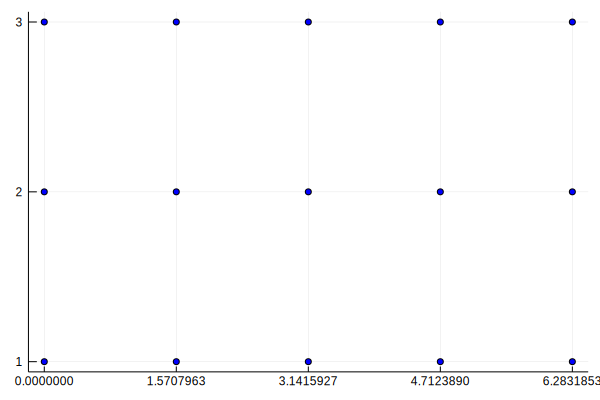

In [5]:
scatter(X,Y,m=:blue,xtick=x,ytick=y,leg=:none)

For a given definition of $f(x,y)$ we can find $\operatorname{mtx}(f)$ by  elementwise operations on the coordinate matrices `X` and `Y`. 

In [6]:
f = (x,y) -> sin(x*y-y);
F = f.(X,Y)

5×3 Array{Float64,2}:
 -0.841471  -0.909297  -0.14112 
  0.540302   0.909297   0.989992
  0.841471  -0.909297   0.14112 
 -0.540302   0.909297  -0.989992
 -0.841471  -0.909297  -0.14112 

We can make nice plots of the function by first choosing a much finer grid.

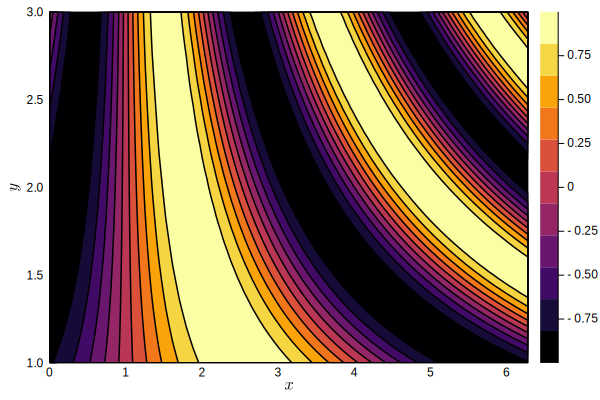

In [7]:
m = 70;   x = 0:2*pi/m:2*pi;
n = 50;   y = 1:2/n:3;
X,Y = FNC.ndgrid(x,y);
F = f.(X,Y);

plot(x,y,F,levels=10,xlabel=L"x",ylabel=L"y",fill=true,match_dimensions=true)

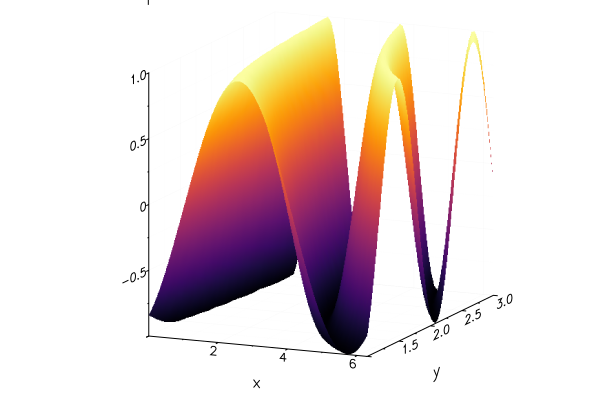

In [8]:
surface(x,y,F,xlabel="x",ylabel="y",zlabel="f(x,y)",match_dimensions=true,leg=:false)   

# Example 13.1.3

Construction of a function over the unit disk is straightforward. We define a grid in $(r,\theta)$  space and compute accordingly. For the function $f(r,\theta)=1-r^4$, for example:

In [9]:
r = (0:40)/40
theta = 2pi*(0:80)/80
R,Theta = FNC.ndgrid(r,theta);
F = @. 1-R^4;

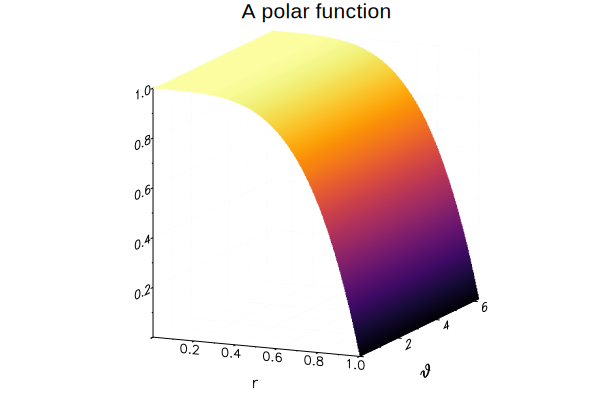

In [10]:
surface(r,theta,F,match_dimensions=true,
    xlabel="r",ylabel="\\theta",title="A polar function",leg=:none)

Of course we are used to seeing such plots over the $(x,y)$ plane. To do this in `Plots` at this writing, we need to switch the graphics backend. (These graphs do not appear in the plain HTML version of the page. To see them you must view the notebook source.) 

In [11]:
plotlyjs()
X = @. R*cos(Theta);  Y = @. R*sin(Theta);
surface(X,Y,F,xlabel="x",ylabel="y",leg=:none)

HTML{String}("    <script class='js-collapse-script'>\n        var curMatch =\n            window.location.href\n            .match(/(.*?)\\/notebooks\\/.*\\.ipynb/);\n\n        curMatch = curMatch ||\n            window.location.href\n            .match(/(.*?)\\/apps\\/.*\\.ipynb/);\n\n        if ( curMatch ) {\n            \$('head').append('<base href=\"' + curMatch[1] + '/\">');\n        }\n    </script>\n")

HTML{String}("<script class='js-collapse-script' src='/assetserver/ddbbc31949a79480ebe7f32814dbfac6c7aef451-assets/webio/dist/bundle.js'></script>")

HTML{String}("<script class='js-collapse-script' src='/assetserver/ddbbc31949a79480ebe7f32814dbfac6c7aef451-assets/providers/ijulia_setup.js'></script>")

HTML{String}("  <script class='js-collapse-script'>\n    \$('.js-collapse-script').parent('.output_subarea').css('padding', '0');\n  </script>\n")

WebIO.mount(this.previousSibling,{"props":{},"nodeType":"Scope","type":"node","instanceArgs":{"imports":{"data":[{"name":"Plotly","type":"js","url":"/assetserver/df0feeb9f0c97672d457e84d9f11efe4a6955476-plotly-latest.min.js"},{"name":null,"type":"js","url":"/assetserver/44b818914405548c94fc22bda7d9fcdd8d4d3251-plotly_webio.bundle.js"}],"type":"async_block"},"id":"scope-de23902c-8651-4925-8eee-3ce1cedec410","handlers":{"_toImage":[(function (options){return this.Plotly.toImage(this.plotElem,options).then((function (data){return WebIO.setval({"name":"image","scope":"scope-de23902c-8651-4925-8eee-3ce1cedec410","id":"ob_05","type":"observable"},data)}))})],"__get_gd_contents":[(function (prop){prop=="data" ? (WebIO.setval({"name":"__gd_contents","scope":"scope-de23902c-8651-4925-8eee-3ce1cedec410","id":"ob_06","type":"observable"},this.plotElem.data)) : undefined; return prop=="layout" ? (WebIO.setval({"name":"__gd_contents","scope":"scope-de23902c-8651-4925-8eee-3ce1cedec410","id":"ob_06","type":"observable"},this.plotElem.layout)) : undefined})],"_promises":{"importsLoaded":[(function (Plotly){var gd=this.dom.querySelector("#plot-e66d6e17-2fbc-4509-902d-7b27a97b3ab6"); this.plotElem=gd; this.Plotly=Plotly; (window.Blink!==undefined) ? (gd.style.width="100%", gd.style.height="100vh", gd.style.marginLeft="0%", gd.style.marginTop="0vh") : undefined; window.onresize=(function (){return Plotly.Plots.resize(gd)}); Plotly.newPlot(gd,[],{"margin":{"l":50,"b":50,"r":50,"t":60}},{}); gd.on("plotly_hover",(function (data){var filtered_data=WebIO.PlotlyCommands.filterEventData(gd,data,"hover"); return !(filtered_data.isnil) ? (WebIO.setval({"name":"hover","scope":"scope-de23902c-8651-4925-8eee-3ce1cedec410","id":"ob_01","type":"observable"},filtered_data.out)) : undefined})); gd.on("plotly_unhover",(function (){return WebIO.setval({"name":"hover","scope":"scope-de23902c-8651-4925-8eee-3ce1cedec410","id":"ob_01","type":"observable"},{})})); gd.on("plotly_selected",(function (data){var filtered_data=WebIO.PlotlyCommands.filterEventData(gd,data,"selected"); return !(filtered_data.isnil) ? (WebIO.setval({"name":"selected","scope":"scope-de23902c-8651-4925-8eee-3ce1cedec410","id":"ob_02","type":"observable"},filtered_data.out)) : undefined})); gd.on("plotly_deselect",(function (){return WebIO.setval({"name":"selected","scope":"scope-de23902c-8651-4925-8eee-3ce1cedec410","id":"ob_02","type":"observable"},{})})); gd.on("plotly_relayout",(function (data){var filtered_data=WebIO.PlotlyCommands.filterEventData(gd,data,"relayout"); return !(filtered_data.isnil) ? (WebIO.setval({"name":"relayout","scope":"scope-de23902c-8651-4925-8eee-3ce1cedec410","id":"ob_04","type":"observable"},filtered_data.out)) : undefined})); return gd.on("plotly_click",(function (data){var filtered_data=WebIO.PlotlyCommands.filterEventData(gd,data,"click"); return !(filtered_data.isnil) ? (WebIO.setval({"name":"click","scope":"scope-de23902c-8651-4925-8eee-3ce1cedec410","id":"ob_03","type":"observable"},filtered_data.out)) : undefined}))})]},"_downloadImage":[(function (options){return this.Plotly.downloadImage(this.plotElem,options)})],"_commands":[(function (args){var fn=args.shift(); var elem=this.plotElem; var Plotly=this.Plotly; args.unshift(elem); return Plotly[fn].apply(this,args)})]},"systemjs_options":null,"observables":{"_toImage":{"sync":false,"id":"ob_08","value":{}},"hover":{"sync":false,"id":"ob_01","value":{}},"selected":{"sync":false,"id":"ob_02","value":{}},"__gd_contents":{"sync":false,"id":"ob_06","value":{}},"click":{"sync":false,"id":"ob_03","value":{}},"image":{"sync":true,"id":"ob_05","value":""},"__get_gd_contents":{"sync":false,"id":"ob_10","value":""},"_downloadImage":{"sync":false,"id":"ob_09","value":{}},"relayout":{"sync":false,"id":"ob_04","value":{}},"_commands":{"sync":false,"id":"ob_07","value":["relayout",{"showlegend":false,"paper_bgcolor":"rgba(255, 255, 255, 1.000)","annotations":[],"height":400,"margin":{"l":0,"b":20,"r":0,"t":20},"plot_bg

In such functions it's up to us to ensure that the values along the line $r=0$ are identical, and that the values on the line $\theta=0$ are identical to those on $\theta=2\pi$. Otherwise the interpretation of the domain as the unit disk is nonsensical.

On the unit sphere we can use color to indicate a function value. For the function $f(x,y,z)=xyz^3$, for instance:

In [12]:
theta = 2pi*(0:60)/60
phi = pi*(0:60)/60
Theta,Phi = FNC.ndgrid(theta,phi);
X = @.cos(Theta)*sin(Phi)
Y = @.sin(Theta)*sin(Phi) 
Z = cos.(Phi)

F = @. X*Y*Z^3
surface(X,Y,Z,fill_z=F,
    xlabel="x",ylabel="y",zlabel="z",title="Function on the unit sphere")

WebIO.mount(this.previousSibling,{"props":{},"nodeType":"Scope","type":"node","instanceArgs":{"imports":{"data":[{"name":"Plotly","type":"js","url":"/assetserver/df0feeb9f0c97672d457e84d9f11efe4a6955476-plotly-latest.min.js"},{"name":null,"type":"js","url":"/assetserver/44b818914405548c94fc22bda7d9fcdd8d4d3251-plotly_webio.bundle.js"}],"type":"async_block"},"id":"scope-492a5e07-e2d6-475c-a881-2e200c0aa301","handlers":{"_toImage":[(function (options){return this.Plotly.toImage(this.plotElem,options).then((function (data){return WebIO.setval({"name":"image","scope":"scope-492a5e07-e2d6-475c-a881-2e200c0aa301","id":"ob_15","type":"observable"},data)}))})],"__get_gd_contents":[(function (prop){prop=="data" ? (WebIO.setval({"name":"__gd_contents","scope":"scope-492a5e07-e2d6-475c-a881-2e200c0aa301","id":"ob_16","type":"observable"},this.plotElem.data)) : undefined; return prop=="layout" ? (WebIO.setval({"name":"__gd_contents","scope":"scope-492a5e07-e2d6-475c-a881-2e200c0aa301","id":"ob_16","type":"observable"},this.plotElem.layout)) : undefined})],"_promises":{"importsLoaded":[(function (Plotly){var gd=this.dom.querySelector("#plot-da9eef1e-f79b-4033-8b32-c88d5f450022"); this.plotElem=gd; this.Plotly=Plotly; (window.Blink!==undefined) ? (gd.style.width="100%", gd.style.height="100vh", gd.style.marginLeft="0%", gd.style.marginTop="0vh") : undefined; window.onresize=(function (){return Plotly.Plots.resize(gd)}); Plotly.newPlot(gd,[],{"margin":{"l":50,"b":50,"r":50,"t":60}},{}); gd.on("plotly_hover",(function (data){var filtered_data=WebIO.PlotlyCommands.filterEventData(gd,data,"hover"); return !(filtered_data.isnil) ? (WebIO.setval({"name":"hover","scope":"scope-492a5e07-e2d6-475c-a881-2e200c0aa301","id":"ob_11","type":"observable"},filtered_data.out)) : undefined})); gd.on("plotly_unhover",(function (){return WebIO.setval({"name":"hover","scope":"scope-492a5e07-e2d6-475c-a881-2e200c0aa301","id":"ob_11","type":"observable"},{})})); gd.on("plotly_selected",(function (data){var filtered_data=WebIO.PlotlyCommands.filterEventData(gd,data,"selected"); return !(filtered_data.isnil) ? (WebIO.setval({"name":"selected","scope":"scope-492a5e07-e2d6-475c-a881-2e200c0aa301","id":"ob_12","type":"observable"},filtered_data.out)) : undefined})); gd.on("plotly_deselect",(function (){return WebIO.setval({"name":"selected","scope":"scope-492a5e07-e2d6-475c-a881-2e200c0aa301","id":"ob_12","type":"observable"},{})})); gd.on("plotly_relayout",(function (data){var filtered_data=WebIO.PlotlyCommands.filterEventData(gd,data,"relayout"); return !(filtered_data.isnil) ? (WebIO.setval({"name":"relayout","scope":"scope-492a5e07-e2d6-475c-a881-2e200c0aa301","id":"ob_14","type":"observable"},filtered_data.out)) : undefined})); return gd.on("plotly_click",(function (data){var filtered_data=WebIO.PlotlyCommands.filterEventData(gd,data,"click"); return !(filtered_data.isnil) ? (WebIO.setval({"name":"click","scope":"scope-492a5e07-e2d6-475c-a881-2e200c0aa301","id":"ob_13","type":"observable"},filtered_data.out)) : undefined}))})]},"_downloadImage":[(function (options){return this.Plotly.downloadImage(this.plotElem,options)})],"_commands":[(function (args){var fn=args.shift(); var elem=this.plotElem; var Plotly=this.Plotly; args.unshift(elem); return Plotly[fn].apply(this,args)})]},"systemjs_options":null,"observables":{"_toImage":{"sync":false,"id":"ob_18","value":{}},"hover":{"sync":false,"id":"ob_11","value":{}},"selected":{"sync":false,"id":"ob_12","value":{}},"__gd_contents":{"sync":false,"id":"ob_16","value":{}},"click":{"sync":false,"id":"ob_13","value":{}},"image":{"sync":true,"id":"ob_15","value":""},"__get_gd_contents":{"sync":false,"id":"ob_20","value":""},"_downloadImage":{"sync":false,"id":"ob_19","value":{}},"relayout":{"sync":false,"id":"ob_14","value":{}},"_commands":{"sync":false,"id":"ob_17","value":["relayout",{"showlegend":true,"paper_bgcolor":"rgba(255, 255, 255, 1.000)","annotations":[{"yanchor":"top","xanchor":"center","rotation":-0.0,"y":1.0,"

In [13]:
gr();

# Example 13.1.4

We define a function and, for reference, its two exact partial derivatives.

In [14]:
u = (x,y) -> sin(x*y-y);
dudx = (x,y) -> y*cos(x*y-y);
dudy = (x,y) -> (x-1)*cos(x*y-y);

We use an equispaced grid and second order finite differences as implemented by `diffmat2`.

In [15]:
m = 80;  x,Dx = FNC.diffmat2(m,[0,2*pi]);
n = 60;  y,Dy = FNC.diffmat2(n,[1,3]);
X,Y = FNC.ndgrid(x,y)
U = u.(X,Y);

Here we compare the exact $\partial u/\partial x$ with the finite-difference approximation.

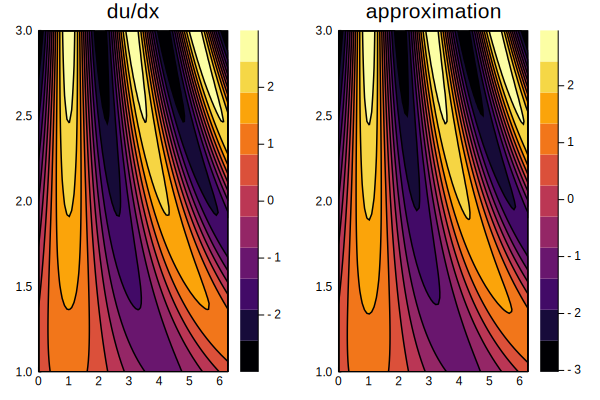

In [16]:
contourf(x,y,dudx.(X,Y),match_dimensions=true,levels=10,layout=(1,2),subplot=1,
    title="du/dx")      
contourf!(x,y,Dx*U,levels=10,match_dimensions=true,layout=(1,2),subplot=2,
    title="approximation")      

We now do the same for $\partial u/\partial y$,

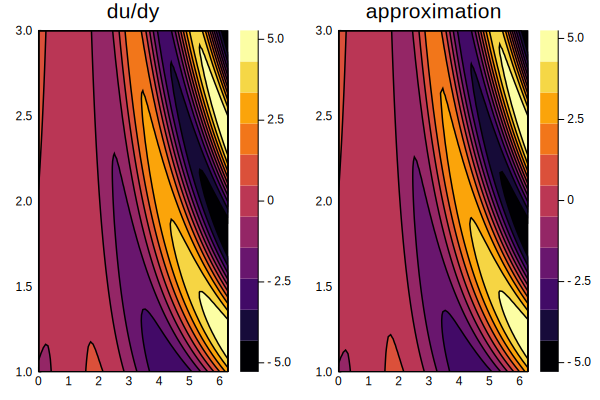

In [17]:
contourf(x,y,dudy.(X,Y),match_dimensions=true,levels=10,layout=(1,2),subplot=1,
    title="du/dy")      
contourf!(x,y,U*Dy',levels=10,match_dimensions=true,layout=(1,2),subplot=2,
    title="approximation")

To the eye there is little difference to be seen, though we expect that the results probably have no more than 2-4 correct digits for these discretization sizes. 

# Example 13.2.1

In [18]:
m = 2;  n = 3;
v = [1:6;]

6-element Array{Int64,1}:
 1
 2
 3
 4
 5
 6

The unvec operation:

In [19]:
V = reshape(v,2,3)   

2×3 Array{Int64,2}:
 1  3  5
 2  4  6

Two equivalent syntaxes for the vec operation:

In [20]:
vec(V) 

6-element Array{Int64,1}:
 1
 2
 3
 4
 5
 6

In [21]:
V[:]                 

6-element Array{Int64,1}:
 1
 2
 3
 4
 5
 6

# Example 13.2.2

We will solve a 2D heat equation $u_t = 0.1(u_{xx} + u_{yy})$ on the square $[-1,1]\times[-1,1]$. We'll assume periodic behavior in both directions.

In [22]:
m = 60;  x,Dx,Dxx = FNC.diffper(m,[-1,1]);
n = 40;  y,Dy,Dyy = FNC.diffper(n,[-1,1]);
X,Y = FNC.ndgrid(x,y);

Note that the initial condition must also be periodic on the domain. 

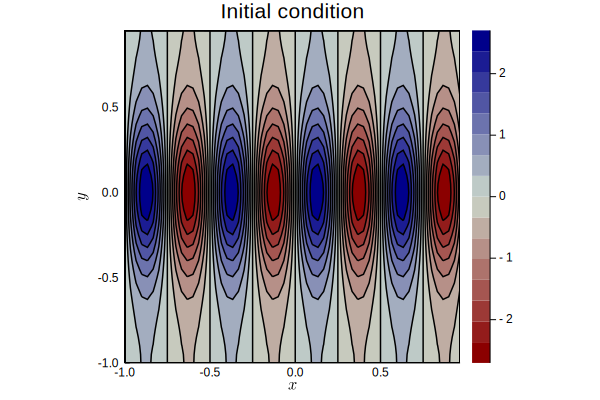

In [23]:
U0 = @. sin(4*pi*X)*exp(cos(pi*Y))
contourf(x,y,U0,match_dimensions=true,color=:redsblues,aspect_ratio=1,
    xaxis=(L"x"),yaxis=(L"y"),title="Initial condition")    

The next two functions map between the natural matrix shape of the unknowns and the vector shape demanded by the ODE solvers. 

In [24]:
function unpack(u) reshape(u,m,n); end
function pack(U) U[:]; end

pack (generic function with 1 method)

This function computes the time derivative for the unknowns. The actual calculations take place using the matrix shape. 

In [25]:
function dudt(u,nu,t)
    U = unpack(u);
    Uxx = Dxx*U;  Uyy = U*Dyy';     # 2nd partials
    dUdt = nu*(Uxx + Uyy);  # PDE
    return pack(dUdt);
end

dudt (generic function with 1 method)

Since this problem is parabolic, a stiff integrator is a good choice.

In [26]:
IVP = ODEProblem(dudt,pack(U0),(0,0.2),0.1)
sol = solve(IVP,Rodas4P());

Here we plot the solution at two different times. (The results are best viewed using an animation.)

In [27]:
an = @animate for t = range(0,stop=0.2,length=81)
    surface(x,y,unpack(sol(t)),match_dimensions=true,color=:redsblues,clims=(-2,2),
        xaxis=(L"x"),yaxis=(L"y"),title="Heat equation, t=$(round(t,digits=3))")
end 
gif(an,"heat2Dper.gif")

┌ Info: Saved animation to 
│   fn = /Users/driscoll/Dropbox/books/fnc-extras/julia/heat2Dper.gif
└ @ Plots /Users/driscoll/.julia/packages/Plots/oiirH/src/animation.jl:90


Plots.AnimatedGif("/Users/driscoll/Dropbox/books/fnc-extras/julia/heat2Dper.gif")

# Example 13.2.3

We will solve an advection-diffusion problem, $u_t + u_x = 1 + \nu(u_{xx} + u_{yy})$, where $u=0$ on the boundary of the square $[-1,1]^2$.

In [28]:
m = 50;  n = 50;
X,Y,d = FNC.rectdisc(m,[-1,1],n,[-1,1]);

The initial condition we specify here is used to impose its boundary values on the solution at all times.

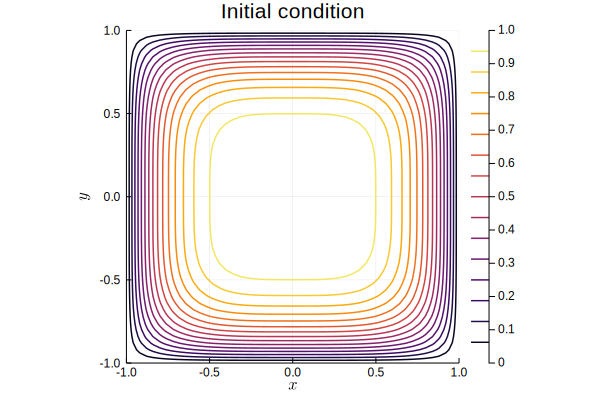

In [29]:
U0 = @. (1-X^4)*(1-Y^4);
plot(X[:,1],Y[1,:],U0,match_dimensions=true,
    xlabel=L"x",ylabel=L"y",aspect_ratio=1,title="Initial condition")

This next function maps the unknowns, given in a vector shape, to a matrix of values including the boundaries.

In [30]:
function unpack(w)
    U = copy(U0)          # get the boundary right
    U[@. !d.isbndy] .= w  # overwrite the interior
    return U
end

unpack (generic function with 1 method)

The next function drops the boundary values and returns a vector of the interior values. It's the inverse of the `unpack` function.

In [31]:
function pack(U) U[@. !d.isbndy]; end

pack (generic function with 1 method)

This function computes the time derivative at the interior nodes only.

In [32]:
function dwdt(w,nu,t)
    U = unpack(w)
    Uxx = d.Dxx*U;  Uyy = U*d.Dyy';   # 2nd partials
    dUdt = 1 .- d.Dx*U + nu*(Uxx + Uyy);  # PDE
    return pack(dUdt)
end

dwdt (generic function with 1 method)

Since this problem is parabolic, a stiff integrator is a good choice. (The solver usually does fine figuring this out on its own, but here we give it a hint.) 

In [33]:
IVP = ODEProblem(dwdt,pack(U0),(0.0,1.0),0.05)
sol = solve(IVP,alg_hints=[:stiff]);

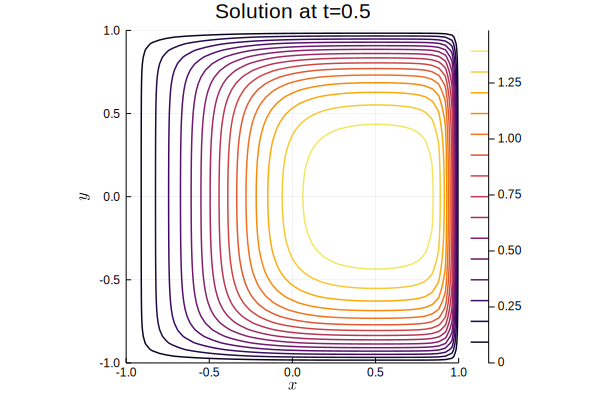

In [34]:
plot(X[:,1],Y[1,:],unpack(sol(0.5)),match_dimensions=true,
    xlabel=L"x",ylabel=L"y",aspect_ratio=1,title="Solution at t=0.5")


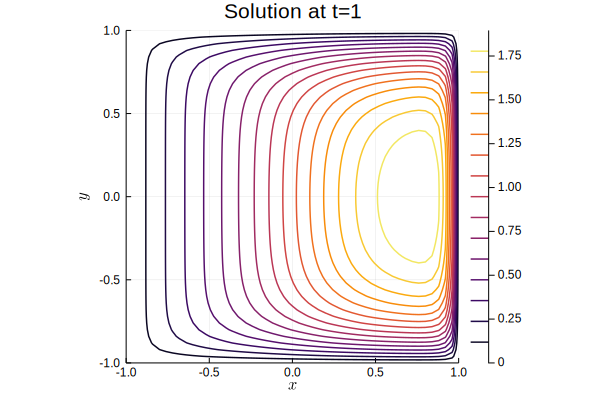

In [35]:
plot(X[:,1],Y[1,:],unpack(sol(1)),match_dimensions=true,
    xlabel=L"x",ylabel=L"y",aspect_ratio=1,title="Solution at t=1")

In [36]:
an = @animate for t in range(0,stop=1,length=80)
    surface(X[:,1],Y[1,:],unpack(sol(t)),match_dimensions=true,aspect_ratio=1,color=:blues,clims=(0,2),
        title="Advection-diffusion solution at t=$(round(t,digits=2))")
end
gif(an,"advdiff2D.gif")

┌ Info: Saved animation to 
│   fn = /Users/driscoll/Dropbox/books/fnc-extras/julia/advdiff2D.gif
└ @ Plots /Users/driscoll/.julia/packages/Plots/oiirH/src/animation.jl:90


Plots.AnimatedGif("/Users/driscoll/Dropbox/books/fnc-extras/julia/advdiff2D.gif")

# Example 13.2.4

In [37]:
m = 60;  n = 60;
X,Y,d = FNC.rectdisc(m,[-2,2],n,[-2,2]);
x = X[:,1]; y = Y[1,:];  # for plotting

Here is the initial condition. The boundary values of $u$ will remain constant.

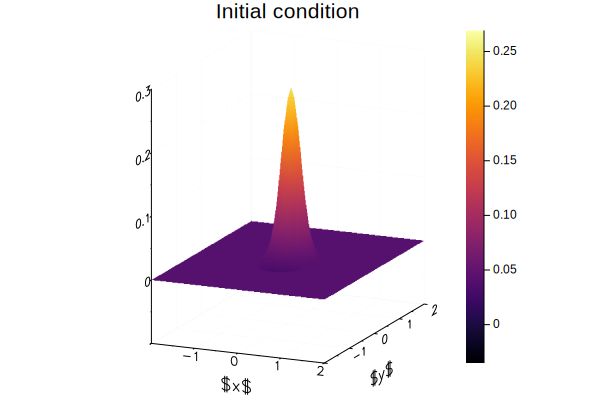

In [38]:
U0 = @. (X+0.2)*exp(-12*(X^2+Y^2))
V0 = zeros(size(U0))
surface(x,y,U0,     
    title="Initial condition",xaxis=(L"x"),yaxis=(L"y") ) 

The `unpack` function separates the unknowns for $u$ and $v$, applies the boundary conditions on $u$, and returns two functions on the grid.

In [39]:
function unpack(w)
    numU = (m-1)*(n-1)   # number of unknowns for U
    U = copy(U0)               
    U[@. !d.isbndy] = w[1:numU]  # overwrite the interior
    V = d.unvec( w[numU+1:end] )     # use all values
    return U,V
end

unpack (generic function with 1 method)

The next function drops the boundary values of $u$ and returns a vector of all the unknowns for both components of the solution. It's the inverse of the `unpack` function.

In [40]:
function pack(U,V)
    w = U[@. !d.isbndy]
    return [ w; V[:] ]
end

pack (generic function with 2 methods)

The following function computes the time derivative of the unknowns. Besides the translation between vector and matrix shapes, it's quite straightforward.

In [41]:
function dwdt(w,tmp,t)
    U,V = unpack(w) 
    dUdt = V
    dWdt = d.Dxx*U + U*d.Dyy'
    return pack(dUdt,dWdt)
end

dwdt (generic function with 1 method)

Since this problem is hyperbolic, not parabolic, a nonstiff integrator like |ode45| is fine and faster than a stiff integrator.

In [42]:
IVP = ODEProblem(dwdt,pack(U0,V0),(0,3.0))
sol = solve(IVP,alg_hints=[:nonstiff]);

In [43]:
an = @animate for t = range(0,stop=3,length=80)
    surface(x,y,unpack(sol(t)),match_dimensions=true,color=:redsblues,clims=(-0.1,0.1),
        title="Wave equation solution at t=$(round(t,digits=2))")
end
gif(an,"wave2D.gif")

┌ Info: Saved animation to 
│   fn = /Users/driscoll/Dropbox/books/fnc-extras/julia/wave2D.gif
└ @ Plots /Users/driscoll/.julia/packages/Plots/oiirH/src/animation.jl:90


Plots.AnimatedGif("/Users/driscoll/Dropbox/books/fnc-extras/julia/wave2D.gif")

# Example 13.3.1

In [44]:
A = [1 2; -2 0]
B = [ 1 10 100; -5 5 3 ]

2×3 Array{Int64,2}:
  1  10  100
 -5   5    3

Applying the definition manually,

In [45]:
A_kron_B = [ A[1,1]*B  A[1,2]*B;
             A[2,1]*B A[2,2]*B ]

4×6 Array{Int64,2}:
  1   10   100    2  20  200
 -5    5     3  -10  10    6
 -2  -20  -200    0   0    0
 10  -10    -6    0   0    0

But it's simpler to use the built-in `kron`. 

In [46]:
kron(A,B)

4×6 Array{Int64,2}:
  1   10   100    2  20  200
 -5    5     3  -10  10    6
 -2  -20  -200    0   0    0
 10  -10    -6    0   0    0

# Example 13.3.2

Here is a forcing function for Poisson's equation.

In [47]:
phi = (x,y) -> x^2 - y + 2;

We pick a crude discretization for illustrative purposes.

In [48]:
m = 5;  n = 6;
X,Y,d = FNC.rectdisc(m,[0,3],n,[-1,1]);

Next, we evaluate $\phi$ on the grid.

In [49]:
F = phi.(X,Y);      

Here are the equations for the PDE collocation, before any modifications are made for the boundary conditions.

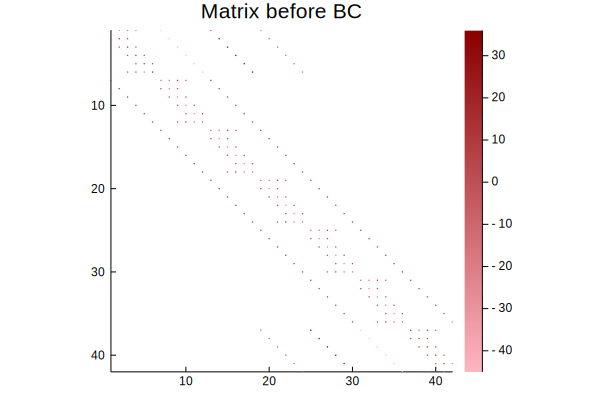

In [50]:
A = kron(d.Iy,d.Dxx) + kron(d.Dyy,d.Ix);
spy(sparse(A),color=:reds,title="Matrix before BC")

In [51]:
b = d.vec(F);
@show N = length(b);

N = length(b) = 42


The array `d.isbndy` is Boolean and the same size as `X`, `Y`, and `F`.

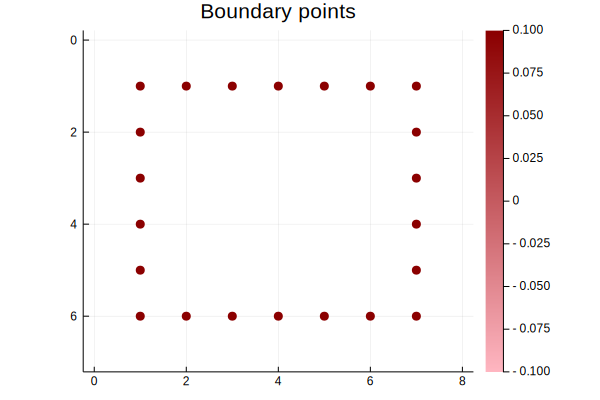

In [52]:
spy(sparse(d.isbndy),m=5,color=:reds,title="Boundary points")
plot!([],label="",grid=:xy,xaxis=([0,8]),yaxis=([0,7]))

Next replace the boundary rows of the system by rows of the identity.

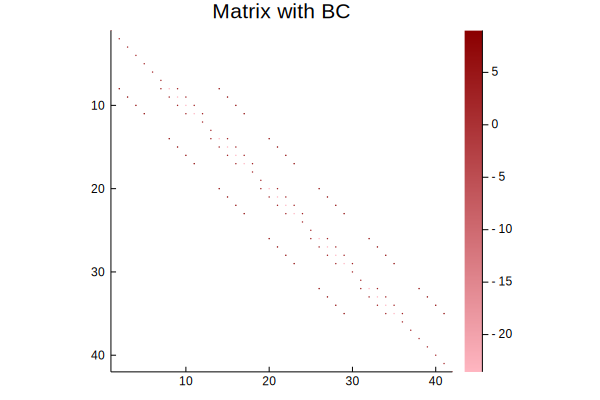

In [53]:
I = spdiagm(0=>ones(size(A,1)))
A[d.isbndy[:],:] = I[d.isbndy[:],:]   # Dirichlet conditions
spy(sparse(A),color=:reds,title="Matrix with BC")    

Finally, we must replace the rows in the vector $\mathbf{b}$ by the boundary values being assigned to the boundary points. Here, we let the boundary values be zero everywhere. 

In [54]:
b[d.isbndy[:]] .= 0;                 # Dirichlet values

Now we can solve for $\mathbf{u}$ and reinterpret it as the matrix-shaped $\mathbf{U}$, the solution on our grid. This grid is much too coarse for the result to look like a smooth function of two variables.

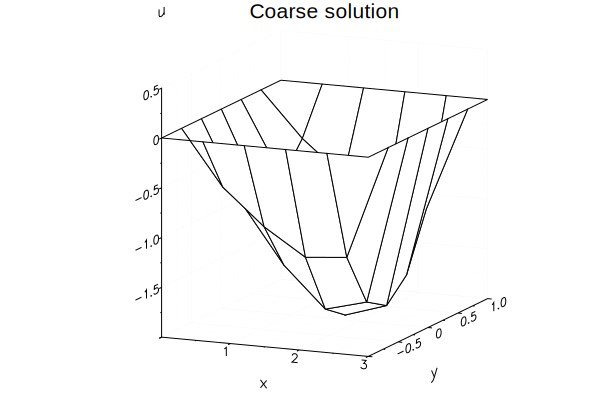

In [55]:
u = A\b;
U = d.unvec(u);

wireframe(X[:,1],Y[1,:],U,match_dimensions=true,
    xaxis=("x"),yaxis=("y"),zaxis=("u(x,y)"),title="Coarse solution")

# Example 13.3.3

First we define the problem on $[0,1]\times[0,2]$. 

In [56]:
f = (x,y) -> -sin(3*x.*y-4*y)*(9*y^2+(3*x-4)^2);
g = (x,y) -> sin(3*x*y-4*y);
xspan = [0,1];  yspan = [0,2];

Here is the finite difference solution.

In [57]:
U,X,Y = FNC.poissonfd(f,g,50,xspan,80,yspan);

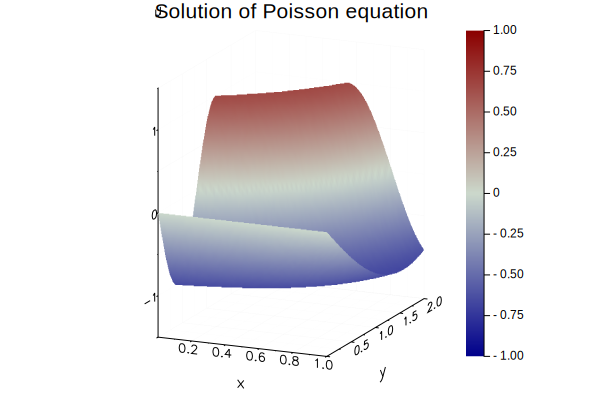

In [58]:
x = X[:,1];  y = Y[1,:];
surface(x,y,U,match_dimensions=true,color=:bluesreds,
    title="Solution of Poisson equation",      
    xaxis=("x"), yaxis=("y"), zaxis=("u(x,y)"))    

The error is a surprisingly smooth function.

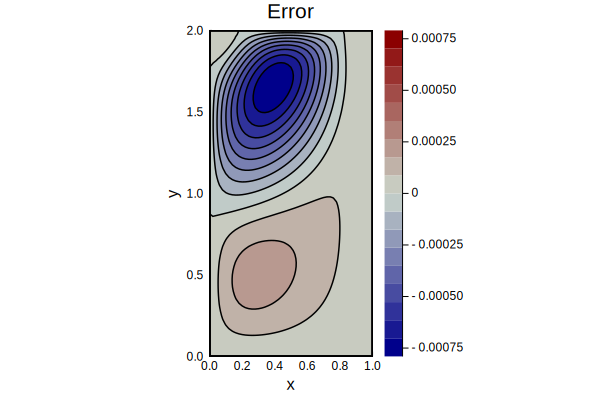

In [59]:
error = g.(X,Y) - U;
M = max( maximum(error),-minimum(error) )   
contourf(x,y,error,levels=17,match_dimensions=true,aspect_ratio=1,clims=(-M,M),color=:bluesreds,
    title="Error",xaxis=("x"),yaxis=("y") )

Because $u$ is specified on the boundary, we should observe that the error is zero on the boundary---else we have done something incorrectly.

# Example 13.4.3

The function here defines the PDE, by way of $\mathbf{f}(\mathbf{u})$ and its derivative (Jacobian matrix). Note that the function will have access to all of the properties of a discretization, as if they were returned by `rectdisc`.

In [60]:
lambda = 1.5

function pde(U,X,Y,d)
    LU = d.Dxx*U + U*d.Dyy';     # apply Laplacian
    F = @. LU - lambda/(U+1)^2   # residual

    L = kron(d.Dyy,d.Ix) + kron(d.Iy,d.Dxx)  
    u = d.vec(U)
    J = L + spdiagm( 0 => @. 2*lambda/(u+1)^3 ) 
    return F,J
end      

pde (generic function with 1 method)

We define a trivial zero function for the Dirichlet boundary condition, and solve. 

In [61]:
g = (x,y) -> 0     # boundary condition
U,X,Y = FNC.newtonpde(pde,g,100,[0,2.5],80,[0,1]);

Norm of residual = 15.097083105883025
Norm of residual = 1.9805242317655594
Norm of residual = 0.07529414212749246
Norm of residual = 0.00013856806251350622
Norm of residual = 6.842839890051017e-9
Norm of residual = 1.945312786223816e-11


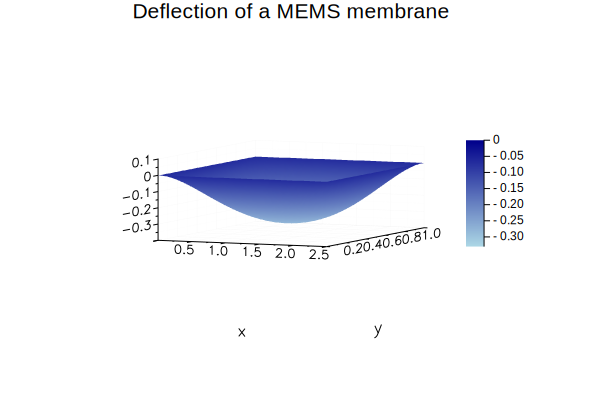

In [62]:
surface(X[:,1],Y[1,:],U',color=:blues,aspect_ratio=1,
    xlabel="x",ylabel="y",title="Deflection of a MEMS membrane")        

# Example 13.4.4

The following defines the PDE, by way of a function for $\mathbf{f}(\mathbf{u})$ and its derivative (Jacobian matrix), and a function for the Dirichlet boundary condition.

In [63]:
function pde(U,X,Y,d)
    LU = d.Dxx*U + U*d.Dyy'     # apply Laplacian
    F = @. U*(1-U^2) + 0.05*LU  # residual

    L = kron(d.Dyy,d.Ix) + kron(d.Iy,d.Dxx)
    u = d.vec(U)
    J = spdiagm(0 => @. 1-3*u^2)  + 0.05*L  # Jacobian
    return F,J
end

g = (x,y) -> tanh(5*(x+2*y-1));    # boundary condition

We solve the PDE and then plot the result.

In [64]:
U,X,Y = FNC.newtonpde(pde,g,100,[0,1],100,[0,1]);

Norm of residual = 50.47103836839601
Norm of residual = 11.501063264269636
Norm of residual = 0.9181128807206167
Norm of residual = 0.0072331463199796575
Norm of residual = 4.983443749367956e-6
Norm of residual = 9.168846733164006e-10
Norm of residual = 1.3858263810161428e-11


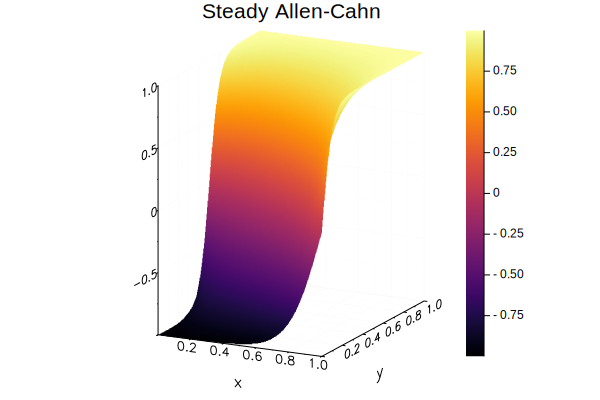

In [65]:
surface(X[:,1],Y[1,:],U',camera=(32,30),xlabel="x",ylabel="y",
    title="Steady Allen-Cahn")

# Example 13.4.5

The following defines the PDE, by way of a function for $\mathbf{f}(\mathbf{u})$ and its derivative (Jacobian matrix), and a function for the Dirichlet boundary condition.

In [66]:
function pde(U,X,Y,d)
    LU = d.Dxx*U + U*d.Dyy'      # apply Laplacian
    Ux = d.Dx*U
    F = @. 1 - Ux + 0.05*LU      # residual

    L = kron(d.Dyy,d.Ix) + kron(d.Iy,d.Dxx)
    u = d.vec(U)
    J = -kron(d.Iy,d.Dx) + 0.05*L  # Jacobian
    return F,J
end

g = (x,y) -> 0;    # boundary condition

In [67]:
U,X,Y = FNC.newtonpde(pde,g,100,[-1,1],100,[-1,1]);

Norm of residual = 45.00249048664894
Norm of residual = 7.408789100925153
Norm of residual = 0.23931847763284914
Norm of residual = 0.0013257691299738963
Norm of residual = 1.229888699099363e-6
Norm of residual = 1.9034964173447842e-10
Norm of residual = 4.058143952423766e-12


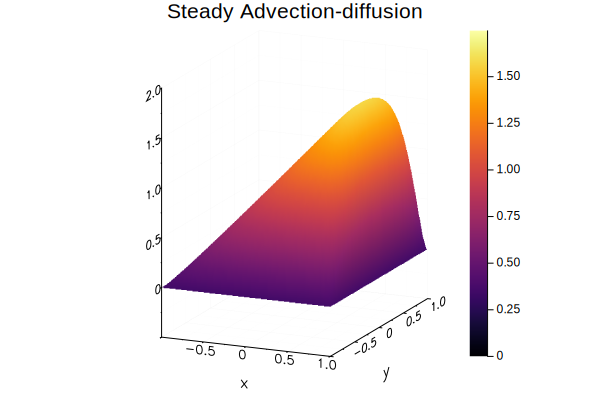

In [68]:
surface(X[:,1],Y[1,:],U',
    xlabel="x",ylabel="y",title="Steady Advection-diffusion")